<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/BTC_Price_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [384]:
import pandas as pd
import numpy as np

In [385]:
df = pd.read_csv('/content/sample_data/coin_Bitcoin.csv')
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [386]:
df.isnull().sum().sum()

0

In [387]:
df = df.drop(['SNo', 'Name', 'Symbol'], axis=1)

In [388]:
df['Date'] = pd.to_datetime(df['Date'])

In [389]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['Mins'] = df['Date'].dt.minute
df['Seconds'] = df['Date'].dt.second

df = df.drop('Date', axis=1)

In [390]:
df.head()

,High,Low,Open,Close,Volume,Marketcap,Year,Month,Day,Hour,Mins,Seconds
0,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,2013,4,29,23,59,59
1,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,2013,4,30,23,59,59
2,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,2013,5,1,23,59,59
3,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,2013,5,2,23,59,59
4,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,2013,5,3,23,59,59


In [391]:
df.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
Year           int64
Month          int64
Day            int64
Hour           int64
Mins           int64
Seconds        int64
dtype: object

In [392]:
df['Year'].max()

2021

In [393]:
df.shape

(2991, 12)

In [394]:
X = df.drop('Close', axis=1)
y = df['Close']

In [395]:
y = np.array(y)

In [396]:
from sklearn.utils import shuffle

In [397]:
X, y = shuffle(X, y)

In [398]:
y.max()

63503.45793019

In [399]:
y.min()

68.43099975585938

In [400]:
from sklearn.model_selection import train_test_split

In [401]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [402]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [403]:
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

RandomForestRegressor()

In [405]:
pred = clf.predict(X_test)

In [409]:
clf.score(X_test, y_test)

0.9996973595280908

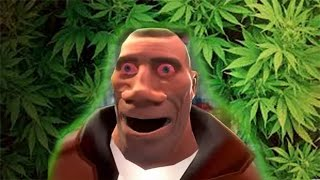